In [ ]:
# importing necessary libraries and dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn import metrics
from google.colab import drive
drive.mount("/content/mydrive")

Mounted at /content/mydrive


In [ ]:
train_data_dir = '/data/train'
test_data_dir = '/data/test'

# reading the labels
train = pd.read_csv('/train.csv')
test  = pd.read_csv('/test.csv')

In [ ]:
# function to load files and extract features
def parser(row, data_dir):
    # setting path
    file_name = os.path.join(data_dir,str(row.id)+'.wav')
    print(file_name)
    # check if the file is corrupted
    try:
        # here kaiser_fast is a technique used for faster extraction
        # X-> audio_time_series_data; sample_rate-> sampling rate
        X, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        
        # extraccting Mel-Frequeny Cepstral Coeficients feature from data
        # y -> accepts time-series audio data; sr -> accepts sampling rate
        # n_mfccs -> no. of MFCCs to return
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis = 0)
    
    except Exception as e:
        print("Error encountered while parsing file: ", e)
        return None, None
    
    # store mfccs features
    feature = mfccs
    # store the respective id
    data_id = row.id
    
    return [data_id, feature]

### Reading train.csv and storing into temp

In [ ]:
# parsing train
tempN = train.apply(parser,axis=1,data_dir=train_data_dir)


In [ ]:
temp=tempN.copy()

In [ ]:
temp.columns=["id","features"]

In [ ]:
temp = pd.DataFrame(temp)

In [ ]:
temp.columns = ['mix']

In [ ]:
temp.keys()

Index(['mix'], dtype='object')

In [ ]:
temp[['id','feature']] = temp['mix'].apply(pd.Series)

In [ ]:
temp.head()

,mix,id,feature
0,"[gudj6np7lx4ov5a9y3wq, [-502.8588146625338, 93...",gudj6np7lx4ov5a9y3wq,"[-502.8588146625338, 93.47187828877036, 15.821..."
1,"[mi2z51y4jb7thxuf8ldr, [-421.46239558740024, 9...",mi2z51y4jb7thxuf8ldr,"[-421.46239558740024, 98.7144336661419, -6.114..."
2,"[ziuab84tvf07snxjhyodp, [-524.4389819294851, 5...",ziuab84tvf07snxjhyodp,"[-524.4389819294851, 59.01710625793562, 0.9220..."
3,"[ulcdyxnbz6jqh9wmk4pa, [-198.14777737944377, 9...",ulcdyxnbz6jqh9wmk4pa,"[-198.14777737944377, 96.0932068978766, -105.6..."
4,"[gj8rfxzae4vibtohk62n1, [-701.8954705857151, 3...",gj8rfxzae4vibtohk62n1,"[-701.8954705857151, 35.878109971314196, -3.34..."


In [ ]:
temp=pd.merge(temp, train, on='id', how='left',validate='many_to_one',right_index=True,left_index=True)

In [ ]:
temp.drop('mix',axis=1,inplace=True)

In [ ]:
temp.head()

,id,feature,label
0,gudj6np7lx4ov5a9y3wq,"[-502.8588146625338, 93.47187828877036, 15.821...",1
1,mi2z51y4jb7thxuf8ldr,"[-421.46239558740024, 98.7144336661419, -6.114...",1
2,ziuab84tvf07snxjhyodp,"[-524.4389819294851, 59.01710625793562, 0.9220...",0
3,ulcdyxnbz6jqh9wmk4pa,"[-198.14777737944377, 96.0932068978766, -105.6...",1
4,gj8rfxzae4vibtohk62n1,"[-701.8954705857151, 35.878109971314196, -3.34...",0


###  Reading test.csv and storing into temp_test

In [ ]:
# parsing test
temp_test = test.apply(parser, axis=1,data_dir=test_data_dir)
temp_test.columns = ['ID', 'feature']

In [ ]:
temp_test = pd.DataFrame(temp_test)
type(temp_test)

pandas.core.frame.DataFrame

In [ ]:
temp_test.columns = ['mix']

In [ ]:
temp_test.keys()

Index(['mix'], dtype='object')

In [ ]:
temp_test[['ID','feature']] = temp_test['mix'].apply(pd.Series)

In [ ]:
temp_test.drop('mix',axis=1,inplace=True)

In [ ]:
print("\n---------------------train data---------------------")
print(type(temp))
print(temp.head())

print("\n---------------------test data---------------------")
print(type(temp_test))
print(temp_test.head())


print('---------------------Checking for NONE values---------------------')
# checking for NONE values
print(temp[temp.label.isnull()])

# removing NONE values from temp
temp = temp[temp.label.notnull()]
temp_test = temp_test[temp_test.notnull()]
#print(temp.ID[temp.label.isnull()])


---------------------train data---------------------
<class 'pandas.core.frame.DataFrame'>
                      id  ... label
0   gudj6np7lx4ov5a9y3wq  ...     1
1   mi2z51y4jb7thxuf8ldr  ...     1
2  ziuab84tvf07snxjhyodp  ...     0
3   ulcdyxnbz6jqh9wmk4pa  ...     1
4  gj8rfxzae4vibtohk62n1  ...     0

[5 rows x 3 columns]

---------------------test data---------------------
<class 'pandas.core.frame.DataFrame'>
                      ID                                            feature
0   4s8mxnikbt0f61qu2ea5  [-552.4038606845866, 84.40007887342473, -2.514...
1  wcr5syvak4mq0tozn6i3d  [-463.5203626494304, 58.23518897053603, -20.05...
2  qt6vl4jushkf7g5webcym  [-426.41583149716746, 85.48748186416807, -15.4...
3   i84wvt3sa7golhud9x1f  [-389.3388445500635, 43.02248373782924, -15.78...
4   o6013rbhaz94tlqmg8nc  [-432.2047792489387, 54.85769008027221, 10.856...
---------------------Checking for NONE values---------------------
Empty DataFrame
Columns: [id, feature, label]
Index: []


In [ ]:
# Label Encoding the audio data
lb = LabelEncoder()

# converting pd.series into np.array for faster processing
X = np.array(temp.feature.tolist())
y = np.array(temp.label.tolist())
Xtest=np.array(temp_test.feature.tolist())

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.3)

Machine learning algorithms

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegressionCV
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from nltk.stem import SnowballStemmer

In [ ]:
mlscores=[]

best alpha is  0.001


Text(0, 0.5, 'acc')

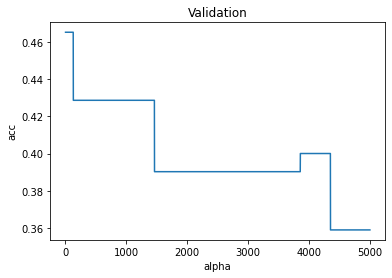

In [ ]:
alphas=[x for x in range(1,5000,1)]
clfx = [(metrics.f1_score(y_test,BernoulliNB(alpha=alpha/1000).fit(X_train, y_train)
.predict(X_test))) for alpha in alphas]
print("best alpha is " ,alphas[clfx.index(max(clfx))]/1000)
clfx = pd.Series(clfx, index = alphas)
clfx.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("acc")

In [ ]:
bnb_imp = BernoulliNB(alpha=0.001) 
bnb_imp.fit(X_train, y_train)
y_pred = bnb_imp.predict(X_test)
print("Bernoulli F1 score: %.3f" % metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("confusion matrix:",metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
mlscores.append(["BernoulliNB",metrics.f1_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred)])

Bernoulli F1 score: 0.465
Precision: 0.5882352941176471
Recall: 0.38461538461538464
confusion matrix: [[11  7]
 [16 10]]
              precision    recall  f1-score   support

           0       0.41      0.61      0.49        18
           1       0.59      0.38      0.47        26

    accuracy                           0.48        44
   macro avg       0.50      0.50      0.48        44
weighted avg       0.51      0.48      0.47        44



In [ ]:
xgb_cl= xgb.XGBClassifier()
xgb_cl.fit(X_train, y_train)
y_pred = xgb_cl.predict(X_test)
print("Xgb's F1 score: %.3f" % metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("confusion matrix:",metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
mlscores.append(["XGBclassifier",metrics.f1_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred)])

Xgb's F1 score: 0.735
Precision: 0.782608695652174
Recall: 0.6923076923076923
confusion matrix: [[13  5]
 [ 8 18]]
              precision    recall  f1-score   support

           0       0.62      0.72      0.67        18
           1       0.78      0.69      0.73        26

    accuracy                           0.70        44
   macro avg       0.70      0.71      0.70        44
weighted avg       0.72      0.70      0.71        44



In [ ]:
LRCV = LogisticRegressionCV(
                            cv=10,
                            scoring='balanced_accuracy',
                            random_state=0,
                            n_jobs=-1,
                            verbose=3,
                            solver="liblinear",
                            max_iter=300).fit(X_train,y_train)
y_pred = LRCV.predict(X_test)
print("Bernoulli F1 score: %.3f" % metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("confusion matrix:",metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
mlscores.append(["LogisticRegressionCV",metrics.f1_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred)])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[LibLinear]Bernoulli F1 score: 0.816
Precision: 0.8695652173913043
Recall: 0.7692307692307693
confusion matrix: [[15  3]
 [ 6 20]]
              precision    recall  f1-score   support

           0       0.71      0.83      0.77        18
           1       0.87      0.77      0.82        26

    accuracy                           0.80        44
   macro avg       0.79      0.80      0.79        44
weighted avg       0.81      0.80      0.80        44



[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.5s finished


In [ ]:
def closeonezero(y_pred):
  for i in range(len(y_pred)):
    if (y_pred[i]<0.5):
      y_pred[i]=0
    else:
      y_pred[i]=1
  return y_pred

In [ ]:
regr = RandomForestRegressor(n_jobs=-1, random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print("Bernoulli F1 score: %.3f" % metrics.f1_score(y_test, closeonezero(y_pred)))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("confusion matrix:",metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
mlscores.append(["RandomForestregression",metrics.f1_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred)])

Bernoulli F1 score: 0.760
Precision: 0.7916666666666666
Recall: 0.7307692307692307
confusion matrix: [[13  5]
 [ 7 19]]
              precision    recall  f1-score   support

           0       0.65      0.72      0.68        18
           1       0.79      0.73      0.76        26

    accuracy                           0.73        44
   macro avg       0.72      0.73      0.72        44
weighted avg       0.73      0.73      0.73        44



In [ ]:
pd.DataFrame(mlscores).sort_values(by=[1], ascending=False)

,0,1,2,3
2,LogisticRegressionCV,0.816327,0.869565,0.769231
3,RandomForestregression,0.760000,0.791667,0.730769
1,XGBclassifier,0.734694,0.782609,0.692308
0,BernoulliNB,0.465116,0.588235,0.384615


In [ ]:
#Submitting current best


y_pred = LRCV.predict(Xtest)
res=test.drop(columns=["target"])
res["label"]=y_pred
res.to_csv("/content/mydrive/My Drive/Colab Notebooks/TriggerWordDarija/submissionml.csv",index=False)

Deep Learning :(garbage cuz there's only 144examples to train from)


In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Model, load_model, Sequential
from keras.layers import Dense, Activation, Dropout, Input, Masking, TimeDistributed, LSTM, Conv1D
from keras.layers import GRU, Bidirectional, BatchNormalization, Reshape
from keras.optimizers import Adam
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras import regularizers
from keras.layers import Lambda
import keras.backend as K

In [ ]:
def categorical_classifier():
    model = Sequential()

    # input and first hidden layer
    model.add(Dense(input_shape=(40,), units=256, activation='relu', kernel_initializer='uniform'))
    model.add(Dropout(0.5))

    # second hidden layer
    model.add(Dense(units=256,activation='relu',kernel_initializer='uniform'))
    model.add(Dropout(0.5))

    # output layer
    model.add(Dense(units=num_labels, activation='softmax'))

    # compiling our model
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

    # training the data
    #model.fit(X,y, batch_size=32, epochs=500, validation_split=0.3)
    return model

In [ ]:
def m5(num_classes=5):
    print('Using Model M5')
    m = Sequential()
    m.add(Conv1D(128,
                 input_shape=[40, 1],
                 kernel_size=80,
                 strides=4,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=1, strides=None))
    m.add(Conv1D(128,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=1, strides=None))
    m.add(Conv1D(256,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=1, strides=None))
    m.add(Conv1D(512,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=1, strides=None))
    m.add(Lambda(lambda x: K.mean(x, axis=1)))  # Same as GAP for 1D Conv Layer
    m.add(Dense(num_classes, activation='softmax'))
    return m


In [ ]:
model = categorical_classifier()

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               10496     
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 514       
Total params: 76,802
Trainable params: 76,802
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, decay=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=["accuracy"])

In [ ]:
# training the data
model.fit(x_train,y_train, batch_size=32, epochs=650, validation_data=(x_test, y_test))